<a href="https://colab.research.google.com/github/Alexandre77777/data_mining/blob/main/1.%20%D0%92%D0%B2%D0%B5%D0%B4%D0%B5%D0%BD%D0%B8%D0%B5/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0/3.%20%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0_%D0%92%D0%B8%D0%B7%D1%83%D0%B0%D0%BB%D1%8C%D0%BD%D1%8B%D0%B9_%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85_(Matplotlib_Seaborn_Pandas)_%D0%A7%D0%B0%D1%81%D1%82%D1%8C_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Практика. Визуальный анализ данных (Matplotlib/Seaborn/Pandas). Часть 1

1. Скачайте этот ноутбук к себе.
2. Заполните пропущенные ячейки, отвечая на заданные вопросы. Там должен быть код! (если не сказано обратное)
3. Сохраните результат в своём гитхаб репозитории.

#### Полезная литература
- [**Блокнот с теорией**](https://colab.research.google.com/github/Alexandre77777/data_mining/blob/main/1.%20%D0%92%D0%B2%D0%B5%D0%B4%D0%B5%D0%BD%D0%B8%D0%B5/%D0%A2%D0%B5%D0%BE%D1%80%D0%B8%D1%8F/3.%20%D0%A2%D0%B5%D0%BE%D1%80%D0%B8%D1%8F_Matplotlib_Seaborn_Plotly.ipynb)
- [Галерея графиков Matplotlib](https://matplotlib.org/gallery/index.html)
- [Галерея графиков Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Открытый курс машинного обучения. Тема 2: Визуализация данных c Python](https://habr.com/company/ods/blog/323210/)

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

## Визуальный анализ данных

В этом задании вам предлагается провести визуальный анализ датасета о прокатах велосипедов https://www.kaggle.com/c/bike-sharing-demand/data. Оригинальная задача предполагает построение модели предсказания количества прокатов в городе в зависимости от погоды.

Для каждого дня проката известны следующие признаки (как они были указаны в источнике данных):
- season: 1 - весна, 2 - лето, 3 - осень, 4 - зима
- yr: 0 - 2011, 1 - 2012
- mnth: от 1 до 12
- holiday: 0 - нет праздника, 1 - есть праздник
- weekday: от 0 до 6
- workingday: 0 - нерабочий день, 1 - рабочий день
- weathersit: оценка благоприятности погоды от 1 (чистый, ясный день) до 4 (ливень, туман)
- temp: температура в Цельсиях
- atemp: температура по ощущениям в Цельсиях
- hum: влажность
- windspeed(mph): скорость ветра в милях в час
- windspeed(ms): скорость ветра в метрах в секунду
- cnt: количество арендованных велосипедов (это целевой признак, его мы будем предсказывать)

Загрузите с помощью pandas файл `bikes_rent.csv.gz` и выведите первые 5 строк. Ознакомьтесь с данными с помощью функций describe и info.

In [3]:
df = pd.read_csv('../data/bikes_rent.csv')
df.insert(2, 'weekday', pd.DatetimeIndex(df['datetime']).weekday)
df.insert(2, 'month', pd.DatetimeIndex(df['datetime']).month)
df.insert(2, 'year', pd.DatetimeIndex(df['datetime']).year)
df = df.drop(columns=['datetime'])

df.head()

,season,year,month,weekday,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011,1,5,0,0,1,9.84,14.395,81,0.0,3,13,16
1,1,2011,1,5,0,0,1,9.02,13.635,80,0.0,8,32,40
2,1,2011,1,5,0,0,1,9.02,13.635,80,0.0,5,27,32
3,1,2011,1,5,0,0,1,9.84,14.395,75,0.0,3,10,13
4,1,2011,1,5,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   year        10886 non-null  int64  
 2   month       10886 non-null  int64  
 3   weekday     10886 non-null  int64  
 4   holiday     10886 non-null  int64  
 5   workingday  10886 non-null  int64  
 6   weather     10886 non-null  int64  
 7   temp        10886 non-null  float64
 8   atemp       10886 non-null  float64
 9   humidity    10886 non-null  int64  
 10  windspeed   10886 non-null  float64
 11  casual      10886 non-null  int64  
 12  registered  10886 non-null  int64  
 13  count       10886 non-null  int64  
dtypes: float64(3), int64(11)
memory usage: 1.2 MB


Давайте посмотрим на графиках, как целевой признак зависит количество прокатов (cnt) зависит от остальных признаков `df.columns[:-1]`.

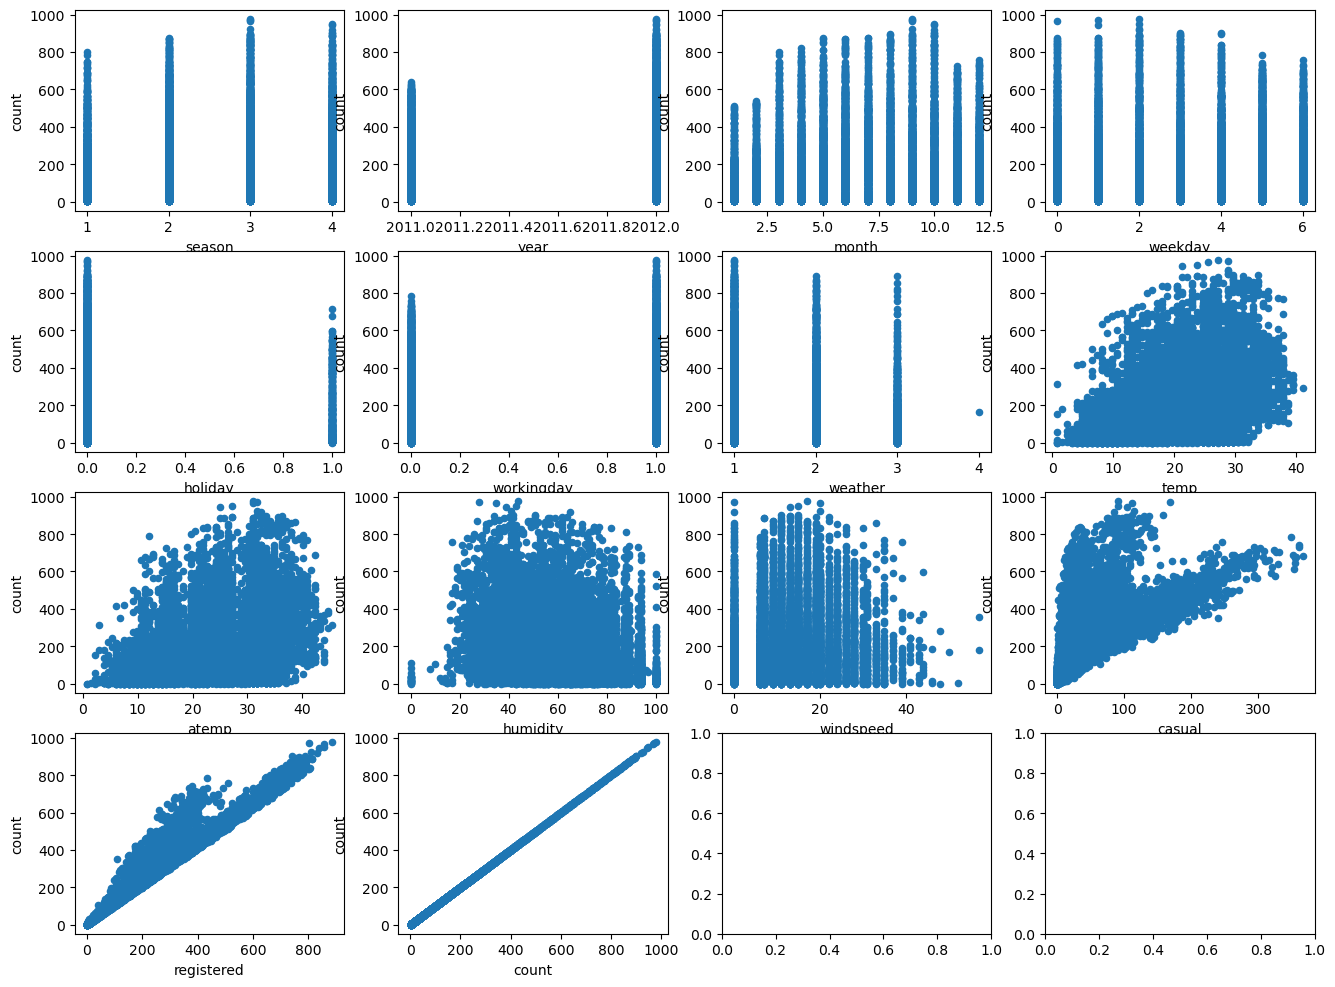

In [5]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(16, 12))
for idx, feature in enumerate(df.columns):
     df.plot(feature, "count", subplots=True, kind="scatter", ax=axes[idx // 4, idx % 4])

## 1. Ответьте на вопросы:

#### Каков характер зависимости числа прокатов от месяца?

ответ: Количество прокатов растет в с начала весны до сентября и имеет минимальные значения зимой

#### Укажите один или два признака, от которых число прокатов скорее всего зависит линейно
_(чем больше значение, тем больше прокатов или наоборот, например)_

- чем больше регистраций тем больше прокатов
- чем больше прокатов, тем больше прокатов


Можете проверить результат с помощью lmplot.

ответ:

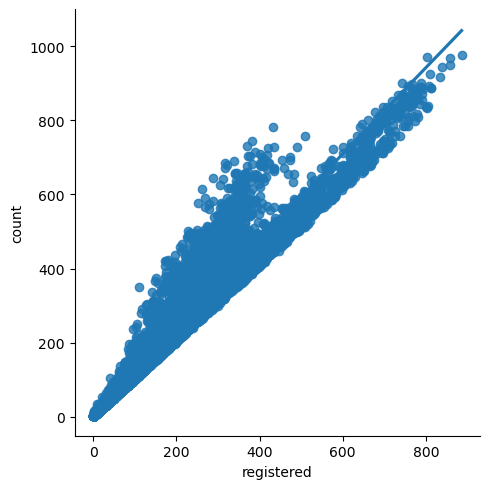

In [6]:
sns.lmplot(x='registered', y='count', data=df)

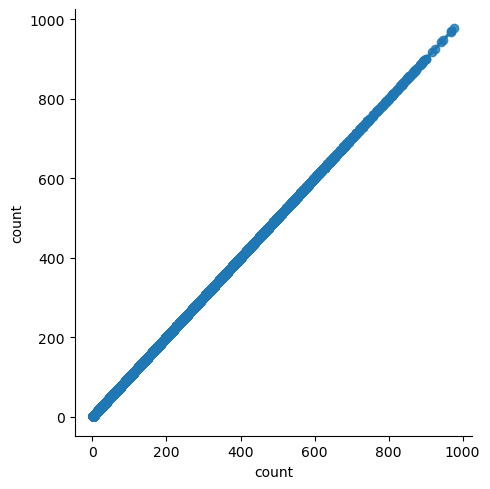

In [7]:
sns.lmplot(x='count', y='count', data=df)

## 2. Корреляционная матрица

Напомним, что корреляция отражает взаимосвязь двух случайных величин. Она бывает положительная и отрицательная. Чем ближе коэффициент корреляции к нулю, тем меньше взаимосвязь. Чем больше абсолютная корреляци, тем взаимосвязь больше.

Постройте heatmap корреляционной матрицы. Матрица формируется средствами pandas, со стандартным значением параметров.

**Ответьте на вопрос**: с какими признаками количество прокатов коррелирует меньше всего (около 4 штуки). А с какими больше всего?

Ответ
Меньше всего количество прокатов коррелирует со следующими признаками:
1. Влажность
1. Погода
1. Рабочий день
1. Выходной день


Больше всего количество прокатов коррелирует со следующими признаками:
1. Регистрации
1. Количество инициированных прокатов незарегистрированных пользователей
1. Температура
1. Температура по ощущениям в Цельсиях

In [8]:
corr = df.corr()
corr

,season,year,month,weekday,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
season,1.000000,-0.004797,0.971524,-0.010553,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439
year,-0.004797,1.000000,-0.004932,-0.003785,0.012021,-0.002482,-0.012548,0.061226,0.058540,-0.078606,-0.015221,0.145241,0.264265,0.260403
month,0.971524,-0.004932,1.000000,-0.002266,0.001731,-0.003394,0.012144,0.257589,0.264173,0.204537,-0.150192,0.092722,0.169451,0.166862
weekday,-0.010553,-0.003785,-0.002266,1.000000,-0.191832,-0.704267,-0.047692,-0.038466,-0.040235,-0.026507,-0.024804,0.246959,-0.084427,-0.002283
holiday,0.029368,0.012021,0.001731,-0.191832,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393
workingday,-0.008126,-0.002482,-0.003394,-0.704267,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594
weather,0.008879,-0.012548,0.012144,-0.047692,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655
temp,0.258689,0.061226,0.257589,-0.038466,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.264744,0.058540,0.264173,-0.040235,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,0.190610,-0.078606,0.204537,-0.026507,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371


<AxesSubplot:>

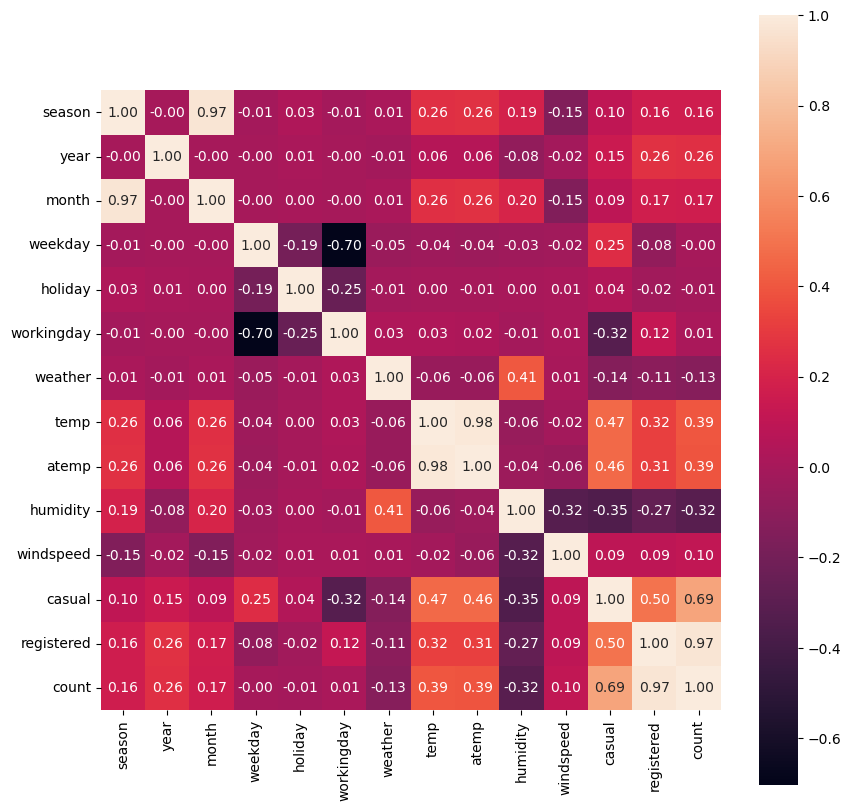

In [9]:
plt.figure(figsize=(10,10))
sns.heatmap(corr, square=True, annot=True, fmt=".2f")

## 3. Barpot

Постройте Bar-график суммарного количества прокатов велосипедов по месяцам за каждый год одновременно. (будет 24 столбика)

**Ответьте на вопрос:** почему в предыдущем графике была такая большая корреляция между количеством прокатов и годом?

Ответ: Потому что в выборке представлено два года, и в одном из них по всем месяцам прокатов больше.

<AxesSubplot:xlabel='year,month'>

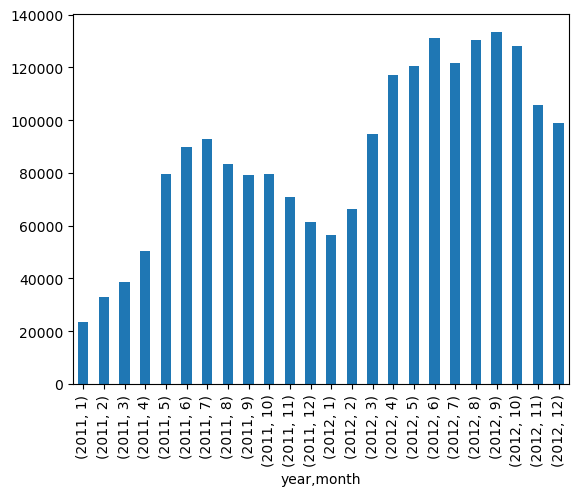

In [57]:
df.groupby(['year', 'month']).sum()['count'].plot(kind='bar')

## 4. Countplot

Постройте countplot диаграммы для признаков `weekday`, `weathersit`,

**Ответьте на вопрос:** что вы можете сказать о том, как формировался этот датасет.

**Ответьте на вопрос:** как называется распределение значений признака `weekday`?

Ответ: Данные собирались только в хорошую погоду, или в месте где не бывает сильных дождей, количество данных на каждый день недели примерно равно
    
Ответ: Распределение значений признака weekday называется равномерным

<AxesSubplot:xlabel='weather', ylabel='count'>

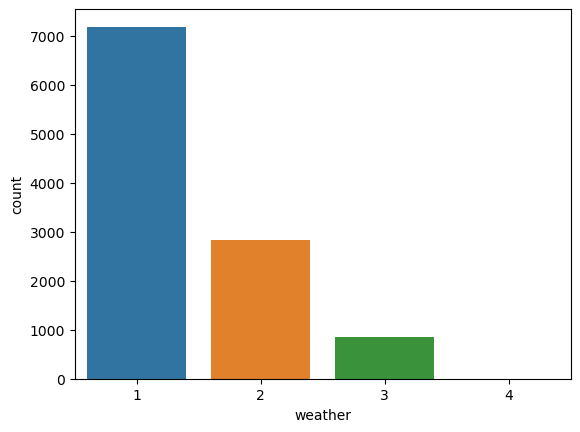

In [58]:
sns.countplot(x='weather', data=df)

<AxesSubplot:xlabel='weekday', ylabel='count'>

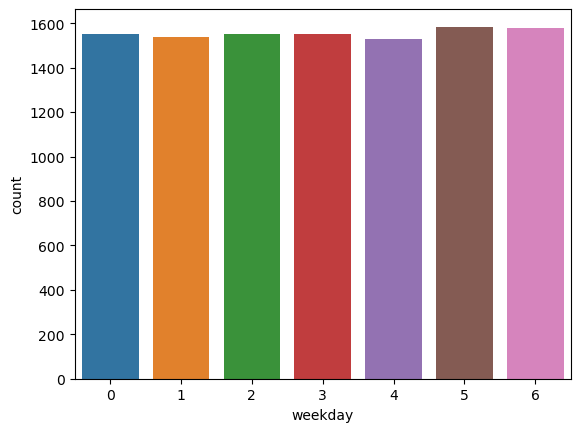

In [78]:
sns.countplot(x='weekday', data=df)

## 5. Распределение

Постройте распределение целевого признака.

**Ответьте на вопрос:** основываясь на графике, сколько приблизительно в среднем прокатов бывает в день?

**Ответьте на вопрос:** Как называется полученное распределение?.

Ответ:
От 0 до 10
Ответ:
Распределение такого вида называется геометрическим

<AxesSubplot:ylabel='Density'>

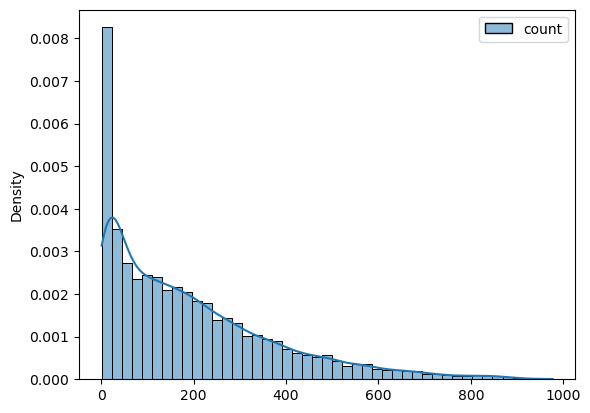

In [26]:
sns.histplot(df[['count']], kde=True, stat='density')

## 6. Совместное распределение признаков

Постройте график совместного распределения признаков температура и ощущение температуры.

**Ответьте на вопрос:** вас в этом графике ничего не настораживает? Почему?

Ответ: При ухудшение ощуения погоды, температура не снижается, а наоборот сдвигается к средним комфортным значениям.

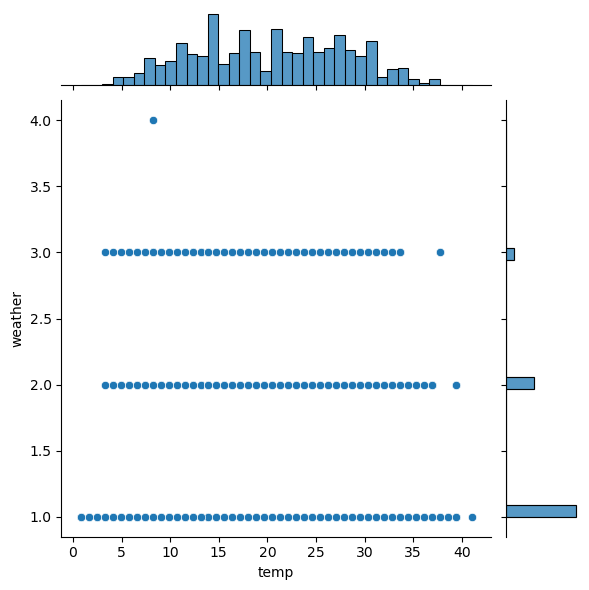

In [20]:
sns.jointplot(x='temp', y='weather', data=df)

## 7. Боксплот (ящик с усами)

Постройте график распределения (боксплот) количества прокатов велосипедов по месяцам в зависимости от того рабочий это день или нет.

**Ответьте на вопрос:** почему в некоторых месяцах чаще берут велосипеды в будний день, а в некоторые - в выходной.


Ответ: Как видно из графика чаще берут велосипеды в будний день в холодные месяцы, так как, видимо, в них велосипед используется для того, чтобы быстро добраться дороботы и миновать холод, в теплые месяцы, велосипед в первую очередь становится видом проведения свободного времени в выходной.

<AxesSubplot:xlabel='month', ylabel='count'>

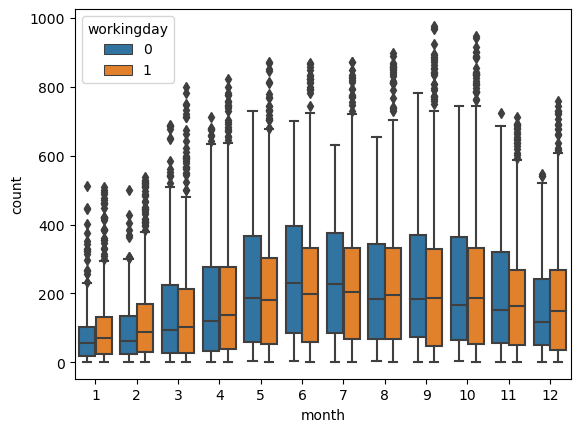

In [24]:
sns.boxplot(x='month', y='count', hue='workingday', data=df)